In [678]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/home/hp/Downloads/car economy price.csv')
pd.set_option('display.max_columns',None)
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### Evalution of Train data's

In [679]:
df.shape

(6019, 14)

In [680]:
df.size

84266

In [681]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [682]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [683]:
df.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [684]:
for features in df.columns:
    print("{} has {} unique no's".format(features,df[features].nunique()))

Unnamed: 0 has 6019 unique no's
Name has 1878 unique no's
Location has 11 unique no's
Year has 22 unique no's
Kilometers_Driven has 3093 unique no's
Fuel_Type has 5 unique no's
Transmission has 2 unique no's
Owner_Type has 4 unique no's
Mileage has 442 unique no's
Engine has 146 unique no's
Power has 372 unique no's
Seats has 9 unique no's
New_Price has 540 unique no's
Price has 1373 unique no's


In [685]:
for count in df.columns:
    print("{} has {} value counts of".format(count,df[count].value_counts()))

Unnamed: 0 has 0       1
4009    1
4018    1
4017    1
4016    1
       ..
2004    1
2003    1
2002    1
2001    1
6018    1
Name: Unnamed: 0, Length: 6019, dtype: int64 value counts of
Name has Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1878, dtype: int64 value counts of
Location has Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64 value counts of
Year has 2014    797
2015    744
2016    741
2013    649
2017    587
2012    580
2011    466
2010 

### EDA Analysis

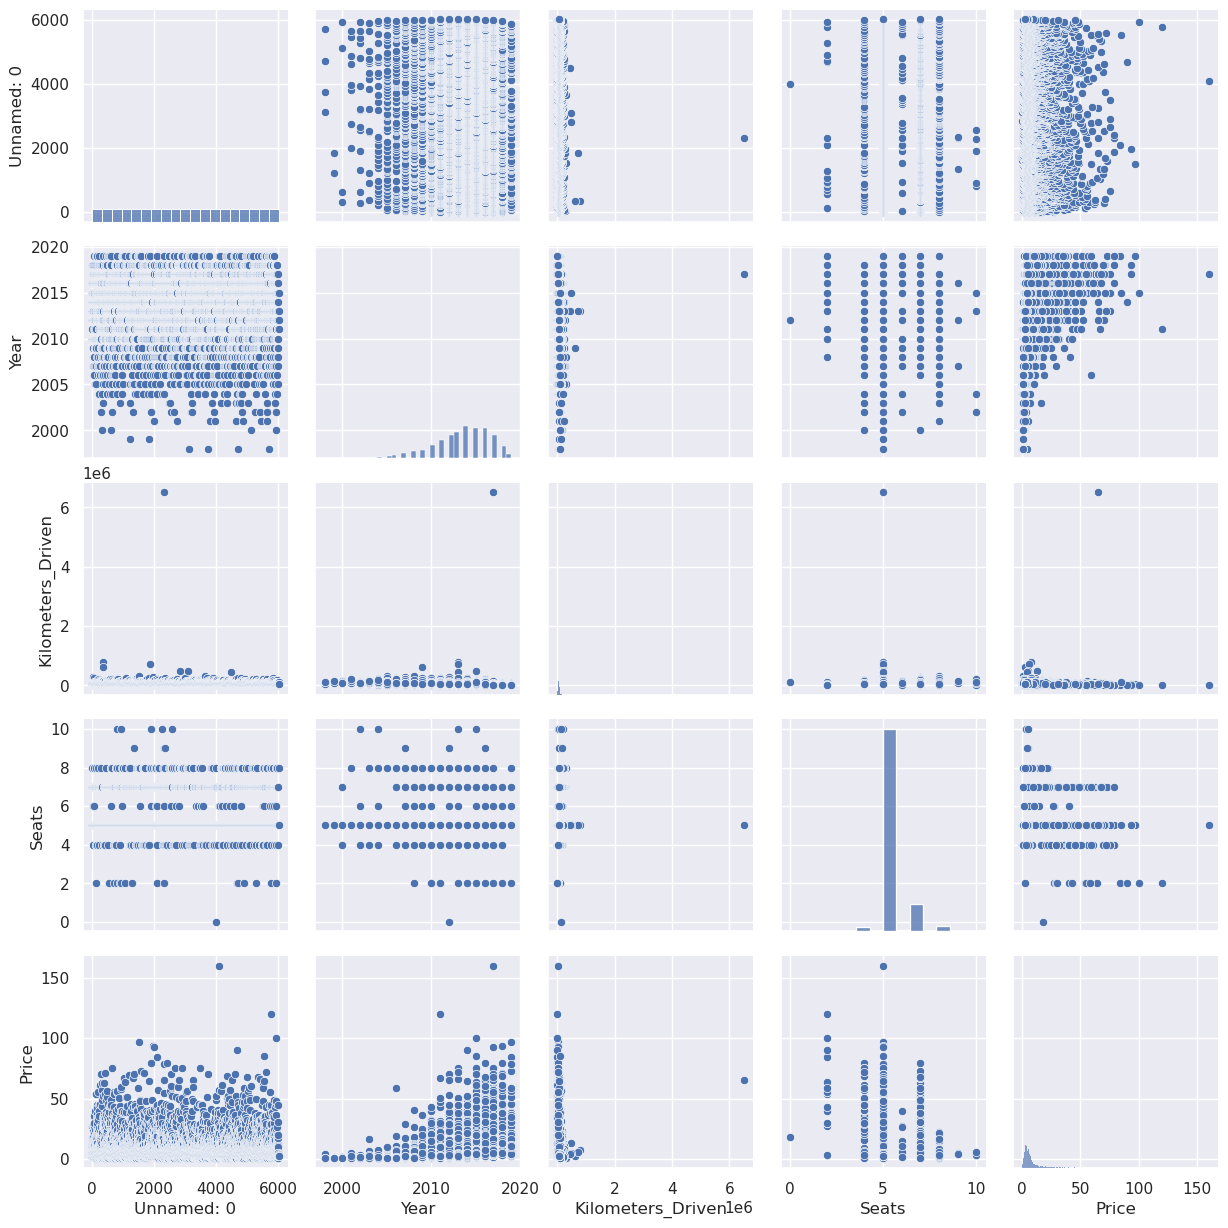

In [686]:
sns.pairplot(data=df)

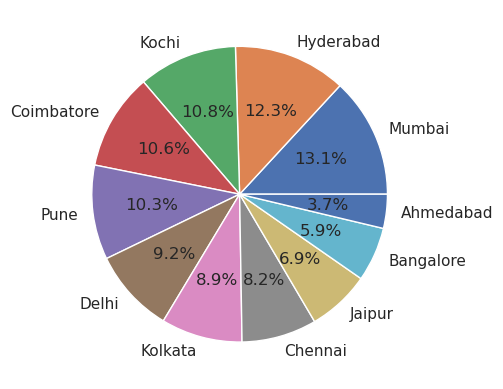

In [687]:
plt.pie(df['Location'].value_counts(),labels=df['Location'].value_counts().index,autopct='%1.1f%%')
plt.show()

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

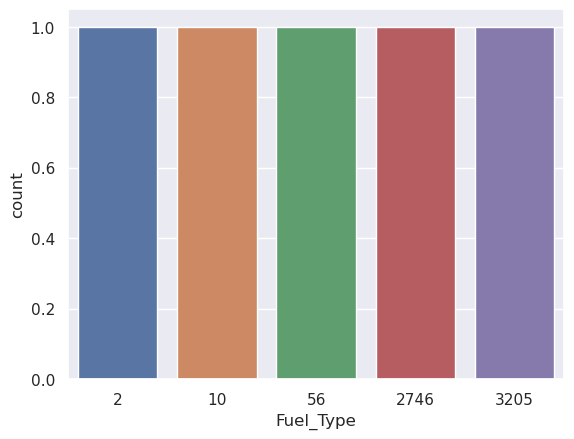

In [688]:
sns.set()
sns.countplot(x=df['Fuel_Type'].value_counts())

<AxesSubplot:xlabel='Transmission', ylabel='count'>

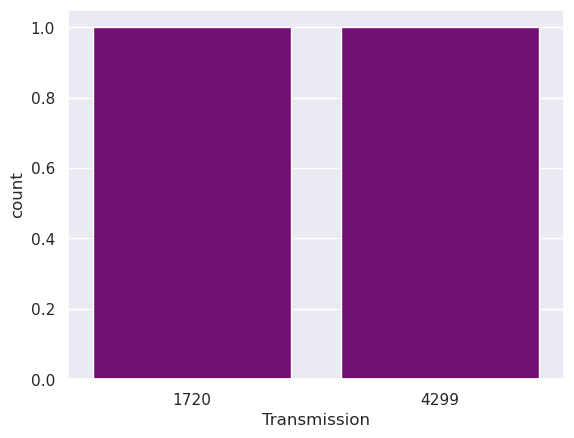

In [689]:
sns.countplot(x=df['Transmission'].value_counts(),color='purple')

<AxesSubplot:xlabel='Owner_Type', ylabel='count'>

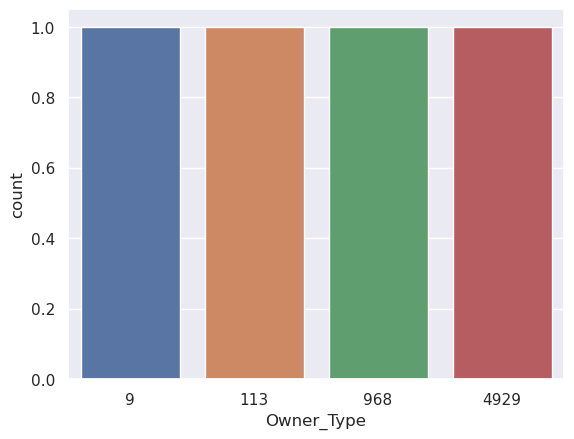

In [690]:
sns.countplot(x=df['Owner_Type'].value_counts())

In [691]:
fig=px.histogram(df['Location'],color=df['Owner_Type'])
fig.show()

In [692]:
fig =px.bar(df,x='Location',y='Owner_Type',color='Fuel_Type')
fig.show()

In [693]:
df.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [694]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df.drop(['Name'],axis=1,inplace=True)
df.drop(['New_Price'],axis=1,inplace=True)
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [695]:
dummies=pd.get_dummies(df[['Location','Fuel_Type','Transmission','Owner_Type']],drop_first=True)
dummies

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
6015,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
6016,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
6017,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0


In [696]:
df1=pd.concat([df,dummies],axis=1)
df1

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
6015,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
6017,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0


In [697]:
df1.shape

(6019, 29)

In [698]:
df1=df1.drop(['Location','Fuel_Type','Transmission','Owner_Type'],axis=1)
df1

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
6015,2015,100000,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
6016,2012,55000,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
6017,2013,46000,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0


In [699]:
df1['Mileage']=df1['Mileage'].str.replace('km/kg','')
df1['Mileage']=df1['Mileage'].str.replace('kmpl','')
df1['Engine']=df1['Engine'].str.replace('CC','')
df1['Power']=df1['Power'].str.replace('bhp','')
df1['Mileage']=df1['Mileage'].str.replace('null','0')
df1['Engine']=df1['Engine'].str.replace('null','0')
df1['Power']=df1['Power'].str.replace('null','0')
df1

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.6,998,58.16,5.0,1.75,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582,126.2,5.0,12.50,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.2,1199,88.7,5.0,4.50,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248,88.76,7.0,6.00,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.2,1968,140.8,5.0,17.74,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.4,1248,74,5.0,4.75,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
6015,2015,100000,24.4,1120,71,5.0,4.00,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
6016,2012,55000,14.0,2498,112,8.0,2.90,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
6017,2013,46000,18.9,998,67.1,5.0,2.65,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0


In [700]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       6019 non-null   int64  
 1   Kilometers_Driven          6019 non-null   int64  
 2   Mileage                    6017 non-null   object 
 3   Engine                     5983 non-null   object 
 4   Power                      5983 non-null   object 
 5   Seats                      5977 non-null   float64
 6   Price                      6019 non-null   float64
 7   Location_Bangalore         6019 non-null   uint8  
 8   Location_Chennai           6019 non-null   uint8  
 9   Location_Coimbatore        6019 non-null   uint8  
 10  Location_Delhi             6019 non-null   uint8  
 11  Location_Hyderabad         6019 non-null   uint8  
 12  Location_Jaipur            6019 non-null   uint8  
 13  Location_Kochi             6019 non-null   uint8

In [701]:
df1['Engine']=df1['Engine'].astype(float)
df1['Power']=df1['Power'].astype(float)
df1['Mileage']=df1['Mileage'].astype(float)
df1.dtypes

Year                           int64
Kilometers_Driven              int64
Mileage                      float64
Engine                       float64
Power                        float64
Seats                        float64
Price                        float64
Location_Bangalore             uint8
Location_Chennai               uint8
Location_Coimbatore            uint8
Location_Delhi                 uint8
Location_Hyderabad             uint8
Location_Jaipur                uint8
Location_Kochi                 uint8
Location_Kolkata               uint8
Location_Mumbai                uint8
Location_Pune                  uint8
Fuel_Type_Diesel               uint8
Fuel_Type_Electric             uint8
Fuel_Type_LPG                  uint8
Fuel_Type_Petrol               uint8
Transmission_Manual            uint8
Owner_Type_Fourth & Above      uint8
Owner_Type_Second              uint8
Owner_Type_Third               uint8
dtype: object

In [702]:
# Replace 0 ==> Nan (not a number)
df1.loc[df1.Engine==0,'Engine']=np.NaN
df1.loc[df1.Power==0,'Power']=np.NaN
df1.loc[df1.Mileage==0,'Mileage']=np.NaN

In [703]:
df1.isna().sum()

Year                           0
Kilometers_Driven              0
Mileage                       70
Engine                        36
Power                        143
Seats                         42
Price                          0
Location_Bangalore             0
Location_Chennai               0
Location_Coimbatore            0
Location_Delhi                 0
Location_Hyderabad             0
Location_Jaipur                0
Location_Kochi                 0
Location_Kolkata               0
Location_Mumbai                0
Location_Pune                  0
Fuel_Type_Diesel               0
Fuel_Type_Electric             0
Fuel_Type_LPG                  0
Fuel_Type_Petrol               0
Transmission_Manual            0
Owner_Type_Fourth & Above      0
Owner_Type_Second              0
Owner_Type_Third               0
dtype: int64

In [704]:
df1['Mileage']=df1['Mileage'].fillna(df1['Mileage'].mean())
df1['Engine']=df1['Engine'].fillna(df1['Engine'].mean())
df1['Power']=df1['Power'].fillna(df1['Power'].mean())
df1['Seats']=df1['Seats'].fillna(df1['Seats'].mode()[0])
df1.isna().sum().any()

False

In [705]:
df1

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,4.75,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,4.00,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,2.90,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
6017,2013,46000,18.90,998.0,67.10,5.0,2.65,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0


In [706]:
x1=df1.drop(['Price','Fuel_Type_Electric'],axis=1)
y1=df1['Price']
y1

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 6019, dtype: float64

In [707]:
y_train,y_test=train_test_split(y1,test_size=0.20,random_state=42)
y_test

2868     5.75
5924    10.08
3764     7.85
4144     2.40
2780     1.60
        ...  
5926     0.55
4216     4.65
1351     6.93
4603     5.38
5668     1.99
Name: Price, Length: 1204, dtype: float64

## Evaluating Test data

In [708]:
dftest=pd.read_csv('/home/hp/Downloads/cartest-data.csv')
dftest.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [709]:
dftest.shape

(1234, 13)

In [710]:
dftest.size

16042

In [711]:
dftest.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price'],
      dtype='object')

In [712]:
dftest.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1234.0,616.500000,356.369424,0.0,308.25,616.5,924.75,1233.0
Year,1234.0,2013.400324,3.179700,1996.0,2011.00,2014.0,2016.00,2019.0
Kilometers_Driven,1234.0,58507.288493,35598.702098,1000.0,34000.00,54572.5,75000.00,350000.0
Seats,1223.0,5.284546,0.825622,2.0,5.00,5.0,5.00,10.0


In [713]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1234 non-null   int64  
 1   Name               1234 non-null   object 
 2   Location           1234 non-null   object 
 3   Year               1234 non-null   int64  
 4   Kilometers_Driven  1234 non-null   int64  
 5   Fuel_Type          1234 non-null   object 
 6   Transmission       1234 non-null   object 
 7   Owner_Type         1234 non-null   object 
 8   Mileage            1234 non-null   object 
 9   Engine             1224 non-null   object 
 10  Power              1224 non-null   object 
 11  Seats              1223 non-null   float64
 12  New_Price          182 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 125.5+ KB


In [714]:
[("{} has {} unique no's".format(features,dftest[features].nunique())) for features in dftest.columns]

["Unnamed: 0 has 1234 unique no's",
 "Name has 769 unique no's",
 "Location has 11 unique no's",
 "Year has 20 unique no's",
 "Kilometers_Driven has 755 unique no's",
 "Fuel_Type has 4 unique no's",
 "Transmission has 2 unique no's",
 "Owner_Type has 4 unique no's",
 "Mileage has 301 unique no's",
 "Engine has 104 unique no's",
 "Power has 249 unique no's",
 "Seats has 7 unique no's",
 "New_Price has 162 unique no's"]

In [715]:
for cnt in dftest.columns:
    print('{}:{}'.format(cnt,dftest[cnt].value_counts()))

Unnamed: 0:0       1
820     1
827     1
826     1
825     1
       ..
410     1
409     1
408     1
407     1
1233    1
Name: Unnamed: 0, Length: 1234, dtype: int64
Name:Maruti Alto LXi                                         9
Honda City 1.5 V MT                                     8
Maruti Swift Dzire VDI                                  8
Volkswagen Polo 1.2 MPI Highline                        8
Hyundai i10 Magna                                       7
                                                       ..
Hyundai Santro GLS I - Euro II                          1
Honda City i DTec VX Option BL                          1
Land Rover Discovery 4 SDV6 SE                          1
Hyundai Verna CRDi 1.6 SX Option                        1
Mercedes-Benz E-Class 2009-2013 E 220 CDI Avantgarde    1
Name: Name, Length: 769, dtype: int64
Location:Mumbai        159
Pune          143
Coimbatore    136
Hyderabad     134
Kochi         121
Kolkata       119
Delhi         106
Chennai        97


In [716]:
dftest.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [717]:
dummies2=pd.get_dummies(dftest[['Location','Fuel_Type','Transmission','Owner_Type']],drop_first=True)
dummies2

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
2,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1230,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1231,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
1232,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


In [718]:
df2=pd.concat([dftest,dummies2],axis=1)
df2

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


In [719]:
df2.drop(['Unnamed: 0','Location','Name','Fuel_Type','Transmission','Owner_Type','New_Price'],axis=1,inplace=True)
df2.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2014,40929,32.26 km/kg,998 CC,58.2 bhp,4.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2013,54493,24.7 kmpl,796 CC,47.3 bhp,5.0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
2,2017,34000,13.68 kmpl,2393 CC,147.8 bhp,7.0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
3,2012,139000,23.59 kmpl,1364 CC,null bhp,5.0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
4,2014,29000,18.5 kmpl,1197 CC,82.85 bhp,5.0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0


### Cleaning the data by removing strings

In [720]:
df2['Mileage']=df2['Mileage'].str.replace('km/kg','')
df2['Mileage']=df2['Mileage'].str.replace('kmpl','')
df2['Engine']=df2['Engine'].str.replace('CC','')
df2['Power']=df2['Power'].str.replace('bhp','')
df2['Mileage']=df2['Mileage'].str.replace('null','0')
df2['Engine']=df2['Engine'].str.replace('null','0')
df2['Power']=df2['Power'].str.replace('null','0')
df2

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2014,40929,32.26,998,58.2,4.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2013,54493,24.7,796,47.3,5.0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
2,2017,34000,13.68,2393,147.8,7.0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
3,2012,139000,23.59,1364,0,5.0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
4,2014,29000,18.5,1197,82.85,5.0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,2011,89411,20.54,1598,103.6,5.0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1230,2015,59000,17.21,1197,103.6,5.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1231,2012,28000,23.08,1461,63.1,5.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
1232,2013,52262,17.2,1197,103.6,5.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


In [721]:
df2['Mileage']=df2['Mileage'].astype(float)
df2['Engine']=df2['Engine'].astype(float)
df2['Power']=df2['Power'].astype(float)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       1234 non-null   int64  
 1   Kilometers_Driven          1234 non-null   int64  
 2   Mileage                    1234 non-null   float64
 3   Engine                     1224 non-null   float64
 4   Power                      1224 non-null   float64
 5   Seats                      1223 non-null   float64
 6   Location_Bangalore         1234 non-null   uint8  
 7   Location_Chennai           1234 non-null   uint8  
 8   Location_Coimbatore        1234 non-null   uint8  
 9   Location_Delhi             1234 non-null   uint8  
 10  Location_Hyderabad         1234 non-null   uint8  
 11  Location_Jaipur            1234 non-null   uint8  
 12  Location_Kochi             1234 non-null   uint8  
 13  Location_Kolkata           1234 non-null   uint8

In [722]:
df2.isna().sum()

Year                          0
Kilometers_Driven             0
Mileage                       0
Engine                       10
Power                        10
Seats                        11
Location_Bangalore            0
Location_Chennai              0
Location_Coimbatore           0
Location_Delhi                0
Location_Hyderabad            0
Location_Jaipur               0
Location_Kochi                0
Location_Kolkata              0
Location_Mumbai               0
Location_Pune                 0
Fuel_Type_Diesel              0
Fuel_Type_LPG                 0
Fuel_Type_Petrol              0
Transmission_Manual           0
Owner_Type_Fourth & Above     0
Owner_Type_Second             0
Owner_Type_Third              0
dtype: int64

In [723]:
df2['Engine']=df2['Engine'].fillna(df2['Engine'].mean())
df2['Seats']=df2['Seats'].fillna(df2['Seats'].mode()[0])
df2['Power']=df2['Power'].fillna(df2['Power'].mean())
df2.isna().sum().any()

False

## Comparing the Train & Test data's

In [724]:
df_final=df2.join(y_test,how='inner')
df_final

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Price
8,2011,66000,17.00,1497.000000,118.000000,5.0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,5.20
14,2014,45000,13.24,1598.000000,102.500000,5.0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,17.50
15,2013,30788,17.05,1995.000000,184.000000,5.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,15.00
17,2009,140000,13.80,1399.000000,68.000000,5.0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,5.99
23,2009,72000,17.50,1593.584967,108.396458,5.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2011,64000,16.55,1968.000000,147.510000,5.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,12.50
1220,2014,57000,15.50,1198.000000,86.700000,5.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,23.00
1221,2017,44556,27.30,1498.000000,98.600000,5.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1.35
1223,2015,39000,18.90,1197.000000,82.000000,5.0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,3.40


In [725]:
df_final.isna().sum().any()

False

In [726]:
x_test=df_final.iloc[:,:-1].values
y_test=df_final.iloc[:,-1].values
x_test

array([[2.0110e+03, 6.6000e+04, 1.7000e+01, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0140e+03, 4.5000e+04, 1.3240e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0130e+03, 3.0788e+04, 1.7050e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [2.0170e+03, 4.4556e+04, 2.7300e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0150e+03, 3.9000e+04, 1.8900e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0090e+03, 4.5463e+04, 1.4490e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [727]:
y_test

array([ 5.2 , 17.5 , 15.  ,  5.99,  1.87,  4.  ,  7.75,  6.75, 11.5 ,
        4.85,  8.85, 10.95, 21.43, 10.  , 13.5 , 10.5 ,  9.65,  1.3 ,
        3.75,  3.11,  5.75,  5.  ,  5.5 ,  3.8 ,  4.65,  3.95,  3.9 ,
       24.  ,  5.25, 19.25, 16.75,  3.23,  5.81, 11.5 ,  5.43, 13.49,
       26.5 ,  6.25,  3.5 ,  2.5 ,  2.1 , 45.  ,  8.35,  1.5 ,  1.45,
        1.25,  6.75,  4.5 ,  5.35,  2.11,  3.5 ,  4.1 , 35.67,  0.85,
        6.8 , 18.12,  2.65,  0.95, 18.5 ,  4.75,  1.8 ,  1.75,  3.75,
        2.8 ,  3.25,  4.35,  3.11,  5.25,  1.35,  4.85, 18.64,  2.8 ,
       12.69,  1.5 ,  2.5 ,  1.5 ,  1.25,  2.8 ,  1.8 , 21.95,  3.3 ,
        2.5 ,  3.5 ,  3.45,  5.25,  2.05,  0.95,  2.9 ,  5.77, 12.95,
        9.48,  4.  ,  3.25, 28.  ,  7.25, 29.67,  8.5 ,  0.8 , 70.99,
        5.5 ,  2.25, 12.03,  8.5 ,  6.58, 22.  ,  2.  ,  3.35, 13.77,
        2.65,  2.25,  3.85,  4.6 ,  2.22, 10.5 , 14.45,  2.5 , 51.43,
        4.5 ,  8.75,  3.  ,  3.55, 15.5 ,  1.6 ,  3.43,  3.6 , 18.5 ,
        6.8 ,  8.36,

## Model Creation

In [728]:
reg=LinearRegression()
reg.fit(x1,y1)
y_pred=reg.predict(x_test)
y_pred

array([  4.52922346,   6.68414174,  23.30619021,   0.67592337,
         4.00847755,  -0.52874529,   3.74103687,   9.51162904,
         9.82381992,  13.26337923,   6.49717371,  17.95333647,
         2.92571473,   7.40805678,   4.67216233,   4.89261336,
         2.33703052,   5.75879501,  22.54798469,  11.06698519,
         1.78978033,   3.10107034,   4.90633592,   5.84532584,
        -3.00589892,  25.15704243,  15.51435785,   7.925787  ,
         7.46172578,  23.17255509,   8.4409527 ,  -0.73627443,
         5.32812951,   0.2933251 ,   5.92817833,   6.97644319,
        17.67556232,  -2.44052489,  -4.44873204,  28.94674923,
        39.58627072,  10.89404991,   7.00126099,  24.26709647,
         5.98671051,  23.29800129,  30.8479592 ,   6.97365766,
         2.13896694,   0.86548415,   1.19433219,   0.98645571,
         6.47082516,  14.03883631,  22.06014471,  -2.06533336,
         7.64583062,   2.18112637,  -2.57016833,   4.36409566,
        16.23907633,   7.21047134,  -4.95153723,   6.29

In [729]:
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean absolute error percentage:',mean_absolute_percentage_error(y_test,y_pred))
print('Mean squarred error:',mean_squared_error(y_test,y_pred))
print('R2 square error:',r2_score(y_test,y_pred))

Mean absolute error: 9.889409431872103
Mean absolute error percentage: 2.104480686006219
Mean squarred error: 202.48458892562167
R2 square error: -0.46267873398756


In [730]:
dfpd=pd.DataFrame({'Actual value':y_test,'Predictied value':y_pred,'Difference':y_test-y_pred})
dfpd

,Actual value,Predictied value,Difference
0,5.20,4.529223,0.670777
1,17.50,6.684142,10.815858
2,15.00,23.306190,-8.306190
3,5.99,0.675923,5.314077
4,1.87,4.008478,-2.138478
...,...,...,...
272,12.50,16.527971,-4.027971
273,23.00,9.116840,13.883160
274,1.35,12.088748,-10.738748
275,3.40,3.627988,-0.227988


Text(0, 0.5, 'Car price')

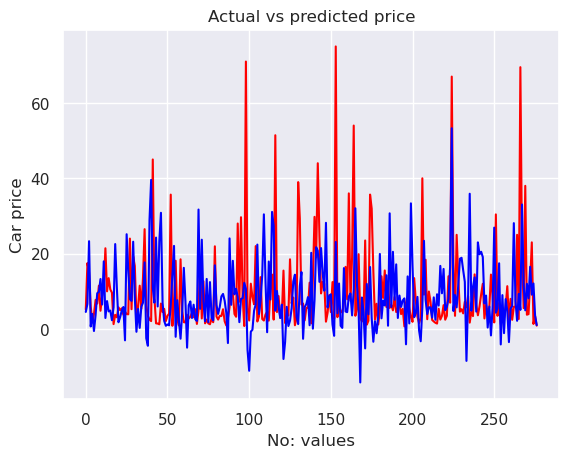

In [731]:
plt.plot(y_test,color='red',label='Actual values')
plt.plot(y_pred,color='blue',label='Predicted values')
plt.title('Actual vs predicted price')
plt.xlabel('No: values')
plt.ylabel('Car price')